In [13]:
# IMPORTS
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import svm
%matplotlib inline

training_set = pd.read_csv('./train.csv')

# Images - rows 0 -> 5000, from column 2 to the end (0 based) "From x"
images = training_set.iloc[0:5000,1:]

# Labels - rows 0 -> 5000, first row only. (0 based but doesn't include upper boundaty) "To x"
labels = training_set.iloc[0:5000,:1]

train_images, test_images,train_labels, test_labels = train_test_split(images, labels, train_size=0.8, random_state=0)

# Since the image is currently one-dimension, we load it into a numpy array and reshape it so that it is two-dimensional 
# (28x28 pixels)
# Then, we plot the image and label with matplotlib

Text(0.5, 1.0, '6')

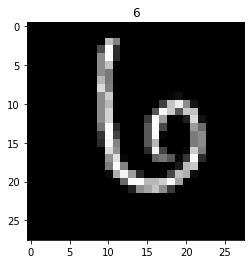

In [15]:
i=1 # Row / Image number
img=train_images.iloc[i].to_numpy() # Building matrix
img=img.reshape((28,28)) # Reshape to image shape
plt.imshow(img,cmap='gray') # Display
plt.title(train_labels.iloc[i,0])

In [ ]:
# First, we use the sklearn.svm module to create a vector classifier
# Next, we pass our training images and labels to the classifier's fit method, which trains our model.
# Finally, the test images and labels are passed to the score method to see how well we trained our model. 
# Fit will return a float between 0-1 indicating our accuracy on the test data set

<ipython-input-21-4d7ed55cd3b8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_images[test_images>0]=1
C:\Users\willi\anaconda3\lib\site-packages\pandas\core\frame.py:3089: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)
<ipython-input-21-4d7ed55cd3b8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

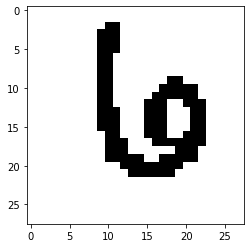

In [21]:
# First simplify the non-black and white image by making eveything not black 1

test_images[test_images>0]=1
train_images[train_images>0]=1

img=train_images.iloc[i].to_numpy().reshape((28,28))
plt.imshow(img,cmap='binary')
plt.title(train_labels.iloc[i])

In [24]:
# Simple SVM Training
clf = svm.SVC()
clf.fit(train_images, train_labels.values.ravel())
clf.score(test_images,test_labels)

0.929

In [25]:
# Importing Test data
test_data=pd.read_csv('./test.csv')
test_data[test_data>0]=1
results=clf.predict(test_data[0:5000])